In [22]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3/mean'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3/data/L{L},T{T:.1f},dt{dt:.1f},p{p},dir{d},s{sss}.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(1, time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}.npy"), S_var)

In [23]:
for L in [8]:
    for T in [100.0]:
        for dt in[1.0]:
            for p in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]: 
                   for d in ["Z"]:
                       average_data(L,T,dt,p,d,500,100)

/Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:190: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


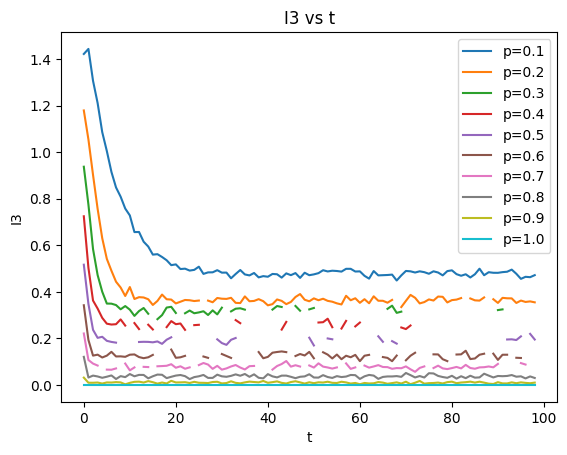

In [16]:
import matplotlib.pyplot as plt

p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
mean_dir = '/Users/uditvarma/Documents/s3/mean'

for p_val in p_values:
    file_path = os.path.join(mean_dir, f"Emean_L{L},T{T},dt{dt},p{p_val}.npy")
    if os.path.isfile(file_path):
        S_mean = np.load(file_path)
        plt.plot(S_mean, label=f'p={p_val}')

plt.xlabel('t')
plt.ylabel('I3')
plt.title(f'I3 vs t')
plt.legend()
plt.show()

In [21]:
len(np.load('/Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.1,dirZ,s9.npy'))

100

In [25]:
import numpy as np
import os

target_dir = "/Users/uditvarma/Documents/s3"

for root, _, files in os.walk(target_dir):
    for file in files:
        if file.endswith(".npy"):
            path = os.path.join(root, file)
            try:
                arr = np.load(path)
                if np.isneginf(arr).any():
                    print(f"-inf found in file: {path}")
            except Exception as e:
                print(f"Failed to read {path}: {e}")


Failed to read /Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/numpy/lib/tests/data/py2-objarr.npy: Object arrays cannot be loaded when allow_pickle=False
Failed to read /Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/numpy/lib/tests/data/py2-np0-objarr.npy: Object arrays cannot be loaded when allow_pickle=False
Failed to read /Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/numpy/lib/tests/data/py3-objarr.npy: Object arrays cannot be loaded when allow_pickle=False
Failed to read /Users/uditvarma/Documents/s3/.venv/lib/python3.13/site-packages/scipy/stats/tests/data/levy_stable/stable-loc-scale-sample-data.npy: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.2,dirZ,s90.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.4,dirZ,s68.npy

/var/folders/jf/m7m4d3dj54zgrgl_hgdy76g00000gn/T/ipykernel_44944/593828401.py:11: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  arr = np.load(path)


-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.7,dirZ,s71.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.6,dirZ,s267.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.4,dirZ,s87.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.6,dirZ,s449.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.4,dirZ,s196.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.5,dirZ,s365.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.3,dirZ,s187.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.7,dirZ,s233.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.3,dirZ,s346.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.4,dirZ,s154.npy
-inf found in file: /Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.6,dirZ,s413.npy
-inf found i

In [26]:
np.load('/Users/uditvarma/Documents/s3/data/L8,T100.0,dt1.0,p0.2,dirZ,s90.npy')

array([ 0.00000000e+00,  2.43687023e-01,  9.94432974e-01,  1.02927900e+00,
        1.29050955e+00,  1.70975665e+00,  1.22486983e+00,  1.13755497e+00,
        5.78249180e-01,  6.72979934e-01,  9.98725165e-01,  1.50723786e+00,
        7.45376554e-01,  9.30934243e-01,  9.91337170e-01,  2.51042630e-01,
        1.61430816e-04, -4.44089210e-16,  1.59007427e+00,  1.79254351e-01,
        5.90448739e-01,  7.38022888e-01,  1.33683878e+00,  1.26677803e+00,
        2.50283374e-01,  8.46837050e-01,  9.15833023e-01,            -inf,
        9.64031467e-01,  2.04098549e-01,  2.22044605e-16,  0.00000000e+00,
        1.27886060e+00,  2.63775978e-01,  9.12261618e-01,  6.09342887e-01,
        6.82373677e-01,  1.25000119e+00,  2.82215176e-01,  1.11292126e+00,
        1.07192202e+00,  1.24175410e+00,  1.70082553e+00,  1.03784249e+00,
        1.00115729e+00,  5.04434981e-01,  7.09746448e-01,  8.47412693e-01,
        1.23670640e-01,  7.40248253e-01,  6.89403202e-02,  1.23217406e+00,
        1.17552817e+00,  

### New data analysis

In [2]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3/L{L},T{T:.1f},dt{dt:.1f},p{p},dir{d},s{sss}.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(1, time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}.npy"), S_var)

In [4]:
for L in [8]:
    for T in [50.0]:
        for dt in[1.0]:
            for p in [1.0]: 
                   for d in ["Z"]:
                       average_data(L,T,dt,p,d,100,50)

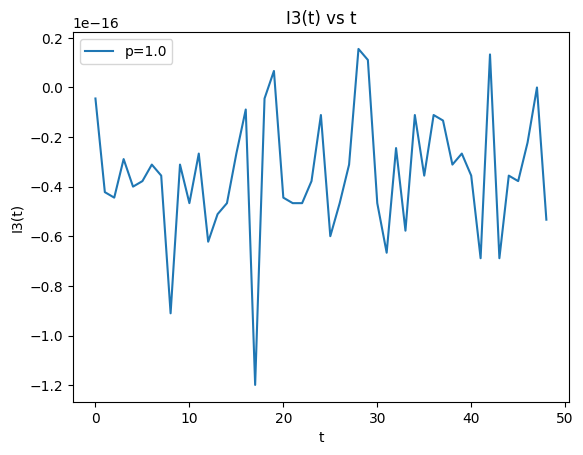

In [5]:
import matplotlib.pyplot as plt

p_values = [1.0]
mean_dir = '/Users/uditvarma/Documents/s3'

for p_val in p_values:
    file_path = os.path.join(mean_dir, f"Emean_L{L},T{T},dt{dt},p{p_val}.npy")
    if os.path.isfile(file_path):
        S_mean = np.load(file_path)
        plt.plot(S_mean, label=f'p={p_val}')

plt.xlabel('t')
plt.ylabel('I3(t)')
plt.title(f'I3(t) vs t')
plt.legend()
plt.show()

In [6]:
np.load("/Users/uditvarma/Documents/s3/Emean_L8,T50.0,dt1.0,p1.0.npy")

array([-4.44089210e-18, -4.21884749e-17, -4.44089210e-17, -2.88657986e-17,
       -3.99680289e-17, -3.77475828e-17, -3.10862447e-17, -3.55271368e-17,
       -9.10382880e-17, -3.10862447e-17, -4.66293670e-17, -2.66453526e-17,
       -6.21724894e-17, -5.10702591e-17, -4.66293670e-17, -2.66453526e-17,
       -8.88178420e-18, -1.19904087e-16, -4.44089210e-18,  6.66133815e-18,
       -4.44089210e-17, -4.66293670e-17, -4.66293670e-17, -3.77475828e-17,
       -1.11022302e-17, -5.99520433e-17, -4.66293670e-17, -3.10862447e-17,
        1.55431223e-17,  1.11022302e-17, -4.66293670e-17, -6.66133815e-17,
       -2.44249065e-17, -5.77315973e-17, -1.11022302e-17, -3.55271368e-17,
       -1.11022302e-17, -1.33226763e-17, -3.10862447e-17, -2.66453526e-17,
       -3.55271368e-17, -6.88338275e-17,  1.33226763e-17, -6.88338275e-17,
       -3.55271368e-17, -3.77475828e-17, -2.22044605e-17, -1.38050658e-31,
       -5.32907052e-17])

In [1]:
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import eigs
from scipy.special import jv

def Hamiltonian(L):
    J_list = np.ones(L)
    hx_list = np.ones(L)
    #hz_list = np.ones(L)
    # get single site operaors
    sx = sparse.csr_matrix(np.array([[0., 1.], [1., 0.]]))
    sz = sparse.csr_matrix(np.array([[1., 0.], [0., -1.]]))
    id = sparse.csr_matrix(np.eye(2))
    sx_list = []  # sx_list[i] = kron([id, id, ..., id, sx, id, .... id])
    sz_list = []
    for i_site in range(L):
        x_ops = [id] * L
        z_ops = [id] * L
        x_ops[i_site] = sx
        z_ops[i_site] = sz
        X = x_ops[0]
        Z = z_ops[0]
        for j in range(1,L):
            X = sparse.kron(X, x_ops[j], 'csr')
            Z = sparse.kron(Z, z_ops[j], 'csr')
        sx_list.append(X)
        sz_list.append(Z)
    H = sparse.csr_matrix((2**L, 2**L))
    for i in range(L):
        H -=  J_list[i] * sz_list[i] @ sz_list[(i + 1) % L]  
        H -=  hx_list[i] * sx_list[i]
        #H -=  hz_list[i] * sz_list[i]
    return H, sx_list, sz_list

def ck(Nc, a, t):
    k = np.arange(Nc)
    ck = (-1j)**k * jv(k, a * t)
    return ck

def Time_evo(psi,Nc,Ht,a,b,t):
    c = ck(Nc,a,t)
    #print(c)
    psi_km0 = Ht.dot(psi)
    psi_km1 = psi
    psi_t = psi_km1*c[0]+2*c[1]*psi_km0
    for k in range(2,Nc):
        psi_k = 2*Ht.dot(psi_km0)-psi_km1
        psi_t = psi_t + 2*c[k]*psi_k
        psi_km1 = psi_km0
        psi_km0 = psi_k
    return np.exp(-1j*b*t)*psi_t

def H_twi(L):
    H,sx_list,sz_list = Hamiltonian(L)
    GS = sparse.linalg.eigs(H, k=1, which='SR', return_eigenvectors=False)[0]
    SS = sparse.linalg.eigs(H, k=1, which='LR', return_eigenvectors=False)[0]
    a = (SS-GS)/2
    b = (SS+GS)/2
    Ht = (H-b*sparse.identity(2**L))/a
    return Ht,a,b,sx_list,sz_list

def I3(psi):
    N = int(np.round(np.log(np.shape(psi)[0])/np.log(2)))
    A = np.arange(N//4)
    B = N//4 + np.arange(N//4)
    C = N//2 + np.arange(N//4)
    D = 3*N//4 + np.arange(N//4)
    AB = A.tolist()+B.tolist()
    BC = B.tolist()+C.tolist()
    AC = A.tolist()+C.tolist()
    SA = calculate_entropy(psi, N, A)
    SB = calculate_entropy(psi, N, B)
    SC = calculate_entropy(psi, N, C)
    SABC = calculate_entropy(psi, N, D)
    SAB = calculate_entropy(psi, N, AB)
    SAC = calculate_entropy(psi, N, AC)
    SBC = calculate_entropy(psi, N, BC)
    return SA+SB+SC+SABC-SAB-SAC-SBC

def calculate_entropy(psi, L, subsystem_sites):
    psi = psi / np.linalg.norm(psi)

    # Reshape the state vector into a tensor with L indices, each of dimension 2
    psi_tensor = psi.reshape([2]*L)

    # Sort subsystem sites and determine the environment sites
    subsystem_sites = sorted(subsystem_sites)
    environment_sites = [i for i in range(L) if i not in subsystem_sites]

    # Move the subsystem indices to the front
    permute_order = subsystem_sites + environment_sites
    psi_tensor = psi_tensor.transpose(permute_order)

    # Reshape into a matrix suitable for SVD
    dim_subsystem = 2**len(subsystem_sites)
    dim_environment = 2**(L - len(subsystem_sites))
    psi_matrix = psi_tensor.reshape(dim_subsystem, dim_environment)

    # Perform SVD
    s = np.linalg.svd(psi_matrix, compute_uv=False)

    # Compute the entropy
    s_squared = s**2
    # Normalize s_squared to sum to 1 due to possible numerical errors
    s_squared /= np.sum(s_squared)
    # Avoid log(0) by adding a small epsilon where s_squared is zero
    s_squared_nonzero = s_squared[s_squared > 1e-15]
    entropy = -np.sum(s_squared_nonzero * np.log(s_squared_nonzero))

    return entropy

def random_product_state(L):
    for i in range(L):
        theta = np.random.uniform(0, np.pi)  # Polar angle
        phi = np.random.uniform(0, 2 * np.pi)  # Azimuthal angle

        # Compute the coefficients for |0⟩ and |1⟩
        alpha = np.cos(theta / 2)  # Coefficient for |0⟩
        beta = np.sin(theta / 2) * np.exp(1j * phi)  # Coefficient for |1⟩

        # Create a tensor product for the current spin state
        temp_state = np.array([alpha, beta])

        # Create the product state by combining previous spins
        if i == 0:
            product_state = temp_state
        else:
            product_state = np.kron(product_state, temp_state)

    # Normalize the final product state
    product_state /= np.linalg.norm(product_state)

    return product_state

def Entropy_t(L,T,dt,p,Nc,direction,shot):
    ####intialize to product state
    np.random.seed(shot)
    s_t = np.zeros(2**L)
    s_t[0] = 1
    #s_t = np.ones(2**L)/np.sqrt(2**L)
    #s_t = random_product_state(L)
    S_list=[]
    ####define H
    Ht,a,b,sx_list,sz_list = H_twi(L=L)
    if direction == "X":
        sm_list = sx_list
    if direction == "Z":
        sm_list = sz_list
    for i in range(int(T//dt)):
        S_list.append(calculate_entropy(s_t, L, np.arange(L//2)))
        #S_list.append(I3(s_t))
        ######time evolution for one dt
        s_t = Time_evo(psi=s_t,Nc=Nc,Ht=Ht,a=a,b=b,t=dt)
        s_t = s_t/np.sqrt(np.conjugate(s_t)@s_t)
        #####do measurement
        if p != 0:
            for l in range(L):
                x =np.random.random()
                if x<p:
                    p_m = 0.5+0.5*np.conjugate(s_t).dot(sm_list[l].dot(s_t))
                    p_m = np.real(p_m)
                    if np.random.random() < p_m:
                        s_t = (s_t + sm_list[l].dot(s_t))/(2 * np.sqrt(p_m))
                    else:
                        s_t = (s_t - sm_list[l].dot(s_t))/(2 * np.sqrt(1 - p_m))
        #####calcuating mutual information      
    np.save(f"L{L},T{T},dt{dt},p{p},dir{direction},s{shot}",S_list)
    return S_list

In [2]:
entropy = Entropy_t(L=8,T=50.0,dt=1.0,p=0.0,Nc=400,direction="Z",shot=1)

In [3]:
import matplotlib.pyplot as plt

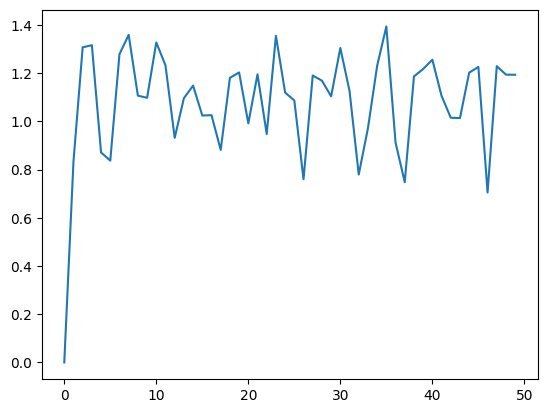

In [7]:
plt.plot(entropy)
plt.savefig("entropy_vs_time_L8_T50_dt1_p0.png")

### Purification Data Analysis

In [37]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3_data/mean_anc'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3_data/data_anc/L{L},T{T},dt{dt:.1f},p{p},dir{d},s{sss}_anc.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(1, time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}_anc.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}_anc.npy"), S_var)

In [38]:
for L in [5, 6, 7, 8, 9]:
    t = 4 * L
    for T in [t]:
        for dt in[1.0]:
            for p in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]: 
                   for d in ["Z"]:
                       average_data(L,T,dt,p,d,500,t)

In [3]:
import os
import re
import shutil

# Base directory containing your .npy files
base_dir = '/Users/uditvarma/Documents/s3_data/mean_anc'

# Pattern to extract L from filenames like: Emean_L8,T300,dt1.0,p0.4.npy
pattern = re.compile(r'^[^_]+_L(\d+),T.*\.npy$')

# List all files
all_files = os.listdir(base_dir)

# Loop through files
for fname in all_files:
    match = pattern.match(fname)
    if match:
        L = match.group(1)  # e.g., "8", "12", ...
        L_dir = os.path.join(base_dir, f'L_{L}')
        os.makedirs(L_dir, exist_ok=True)

        src = os.path.join(base_dir, fname)
        dst = os.path.join(L_dir, fname)
        shutil.move(src, dst)
        print(f"Moved {fname} → {L_dir}")

Moved Emean_L6,T60,dt1.0,p0.9_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_6
Moved Emean_L5,T50,dt1.0,p0.1_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_5
Moved Evar_L6,T60,dt1.0,p0.4_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_6
Moved Evar_L5,T50,dt1.0,p0.5_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_5
Moved Emean_L5,T50,dt1.0,p0.8_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_5
Moved Emean_L6,T60,dt1.0,p0.1_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_6
Moved Evar_L5,T50,dt1.0,p0.4_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_5
Moved Emean_L5,T50,dt1.0,p0.9_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_5
Moved Emean_L6,T60,dt1.0,p0.8_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_6
Moved Evar_L6,T60,dt1.0,p0.5_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_6
Moved Evar_L5,T50,dt1.0,p0.6_anc.npy → /Users/uditvarma/Documents/s3_data/mean_anc/L_5
Moved Emean_L6,T60,dt1.0,p0.3_anc.npy

In [4]:
import os
import shutil

# Base directory containing L_x folders
base_dir = '/Users/uditvarma/Documents/s3_data/mean_anc'

# List of L values
L_list = [5, 6]

for L in L_list:
    folder_name = f'L_{L}'
    source_dir = os.path.join(base_dir, folder_name)
    target_dir = os.path.join(source_dir, 'var')

    # Skip if the source directory doesn't exist
    if not os.path.isdir(source_dir):
        print(f"Skipping missing folder: {source_dir}")
        continue

    # Create 'var' subfolder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move files starting with "Evar"
    for filename in os.listdir(source_dir):
        if filename.startswith('Evar'):
            src_path = os.path.join(source_dir, filename)
            dst_path = os.path.join(target_dir, filename)
            shutil.move(src_path, dst_path)
            print(f"Moved {filename} to {target_dir}")

Moved Evar_L5,T50,dt1.0,p0.5_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L5,T50,dt1.0,p0.4_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L5,T50,dt1.0,p0.6_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L5,T50,dt1.0,p0.7_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L5,T50,dt1.0,p0.2_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L5,T50,dt1.0,p1.0_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L5,T50,dt1.0,p0.3_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L5,T50,dt1.0,p0.8_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L5,T50,dt1.0,p0.1_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L5,T50,dt1.0,p0.9_anc.npy to /Users/uditvarma/Documents/s3_data/mean_anc/L_5/var
Moved Evar_L6,T60,dt1.0,p0.4_anc.npy to /Users/uditvarma/Documents/s3_data/mean_

In [5]:
import numpy as np
import os

# Base directory where your files are located
base_dir = '/Users/uditvarma/Documents/s3_data/mean_anc'

# List of L values you want to process
L_values = [5, 6]

# Loop through each L value
for L in L_values:
    # Create the directory path dynamically based on L
    data_dir = os.path.join(base_dir, f'L_{L}')

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Directory for L={L} not found: {data_dir}")
        continue

    # Get all .npy files in the directory and sort them
    file_list = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])

    # Initialize a list to hold the first data points
    last_data_points = []

    # Loop through the files and collect the first data point
    for file_name in file_list:
        data = np.load(os.path.join(data_dir, file_name))
        last_data_points.append(data[-1])  # Collect first data point

    # Convert to NumPy array and save
    last_data_array = np.array(last_data_points)
    output_file = os.path.join(base_dir, f'timeT_points_L{L}.npy')
    np.save(output_file, last_data_array)

    print(f"Data for L={L} saved to: {output_file}")

Data for L=5 saved to: /Users/uditvarma/Documents/s3_data/mean_anc/timeT_points_L5.npy
Data for L=6 saved to: /Users/uditvarma/Documents/s3_data/mean_anc/timeT_points_L6.npy


The following result is with the initial state as a Bell pair:
\begin{equation*}
    |\psi(t=0)\rangle = |\uparrow \downarrow \dots \rangle |\Uparrow\rangle + |\downarrow \uparrow \dots\rangle |\Downarrow\rangle
\end{equation*}

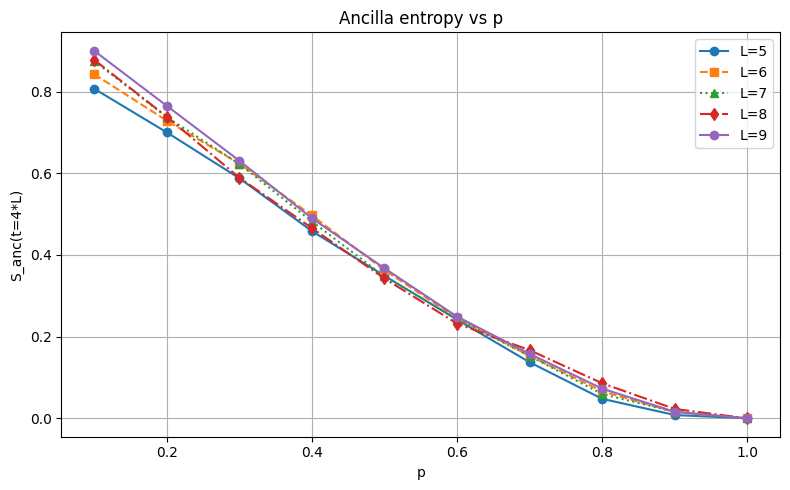

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8, 9]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Ancilla entropy vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=4*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

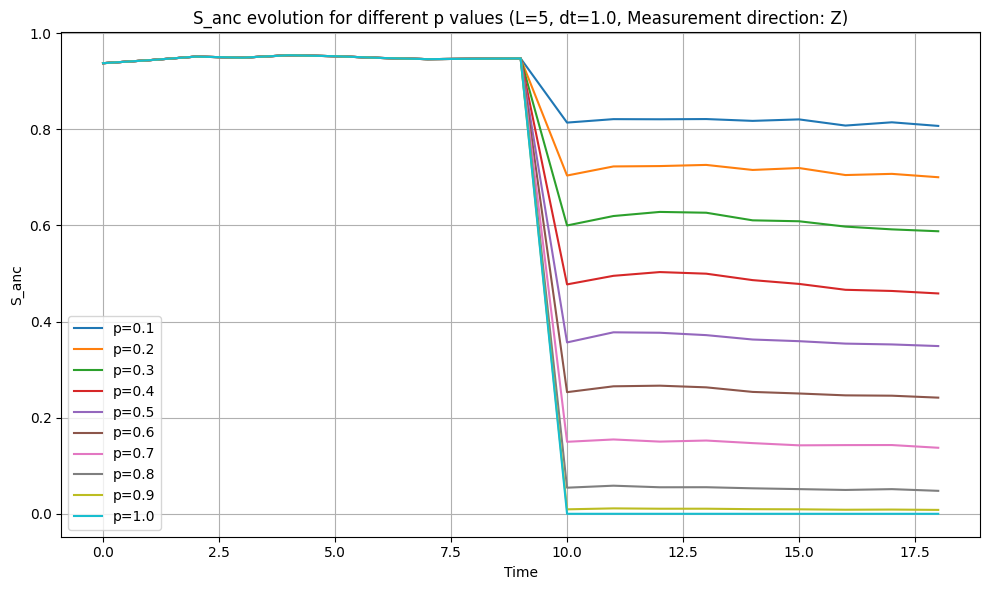

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_5_vs_t_z.svg')
plt.show()


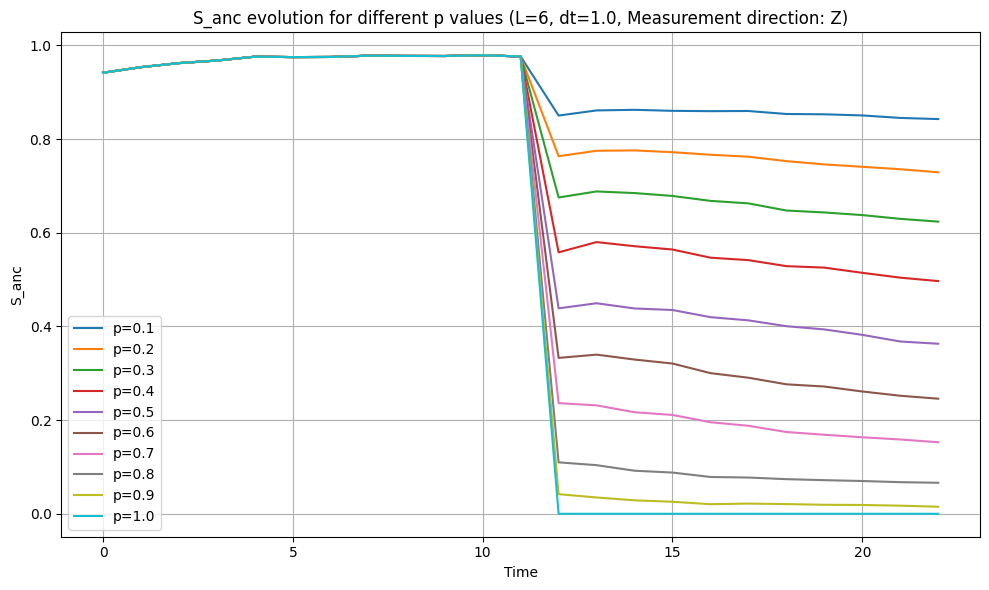

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_6_vs_t_z.svg')
plt.show()


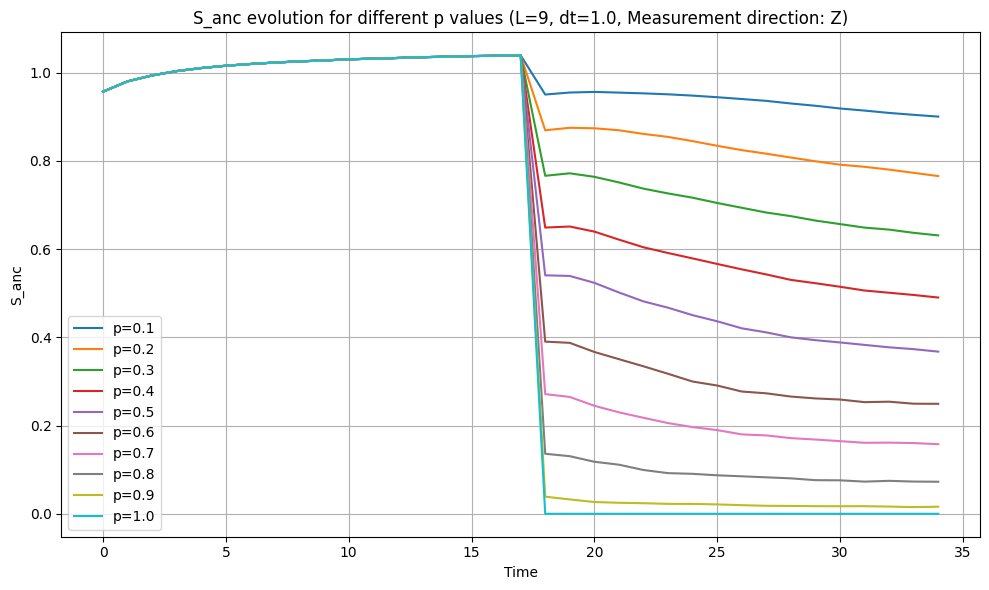

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/19 Aug 2025/mean_anc/L_9"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L9")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=9, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_9_vs_t_z.svg')
plt.show()

The following result is with the initial state as a Bell pair:
\begin{equation*}
    |\psi(t=0)\rangle = |\uparrow \downarrow \dots \rangle |\Uparrow\rangle + |00 \dots\rangle |0\rangle + |\downarrow \uparrow \dots\rangle |\Downarrow\rangle
\end{equation*}

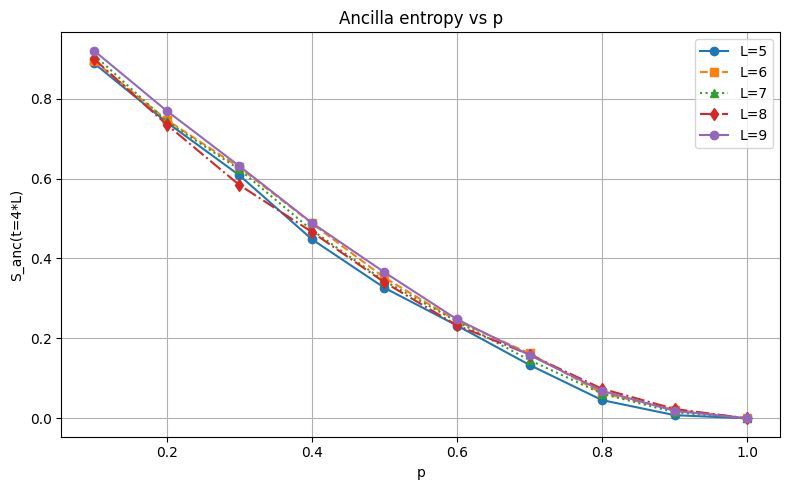

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8, 9]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Ancilla entropy vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=4*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T_vs_p_s3_ghz.svg')
# plt.savefig('I3T_p_Z.png')

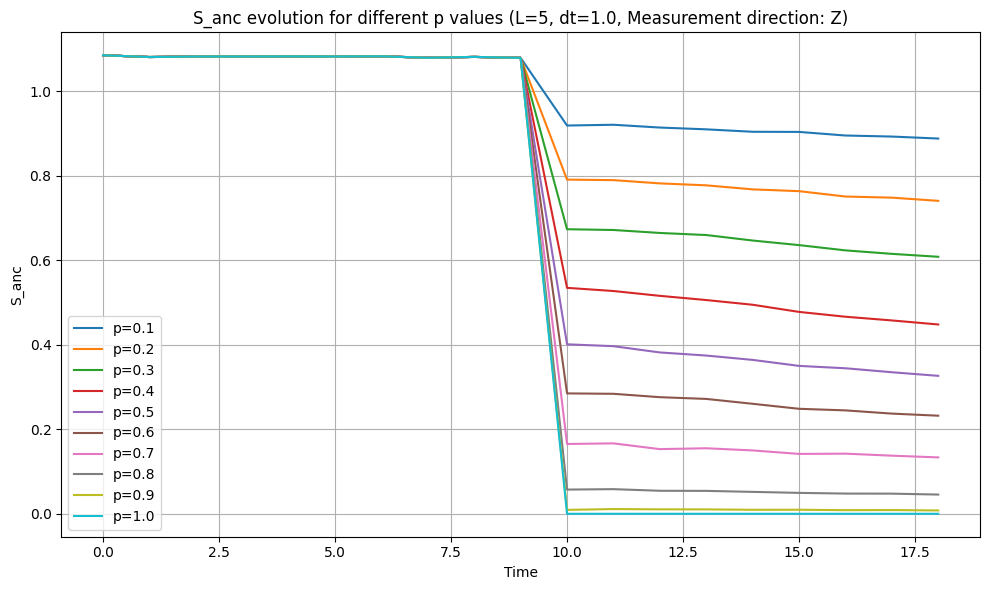

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_5_vs_t_z_ghz.svg')
plt.show()


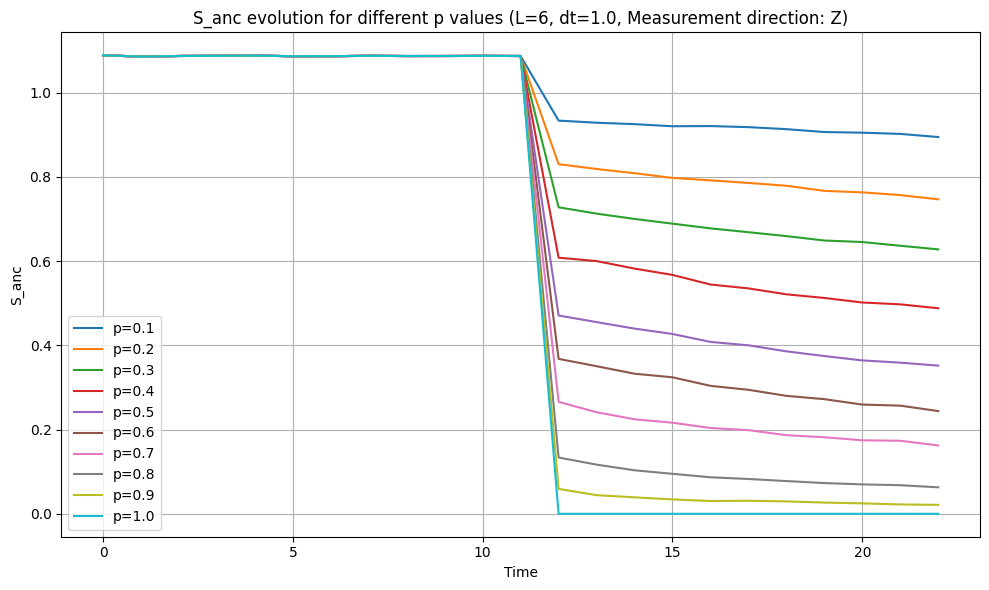

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_6_vs_t_z_ghz.svg')
plt.show()


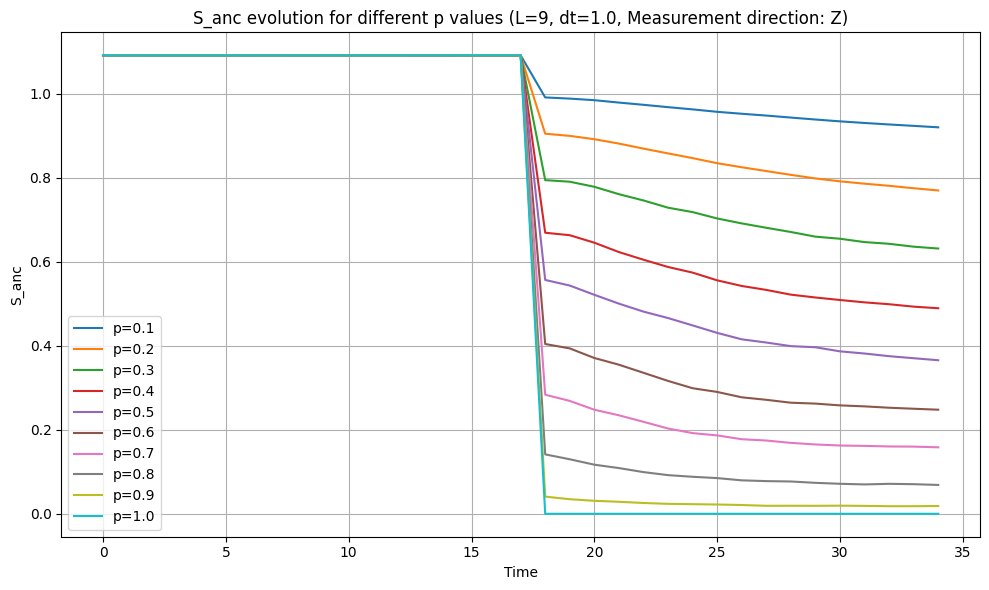

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_9"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L9")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=9, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_9_vs_t_z_ghz.svg')
plt.show()


Analysing the saturation of the ancilla entropies:

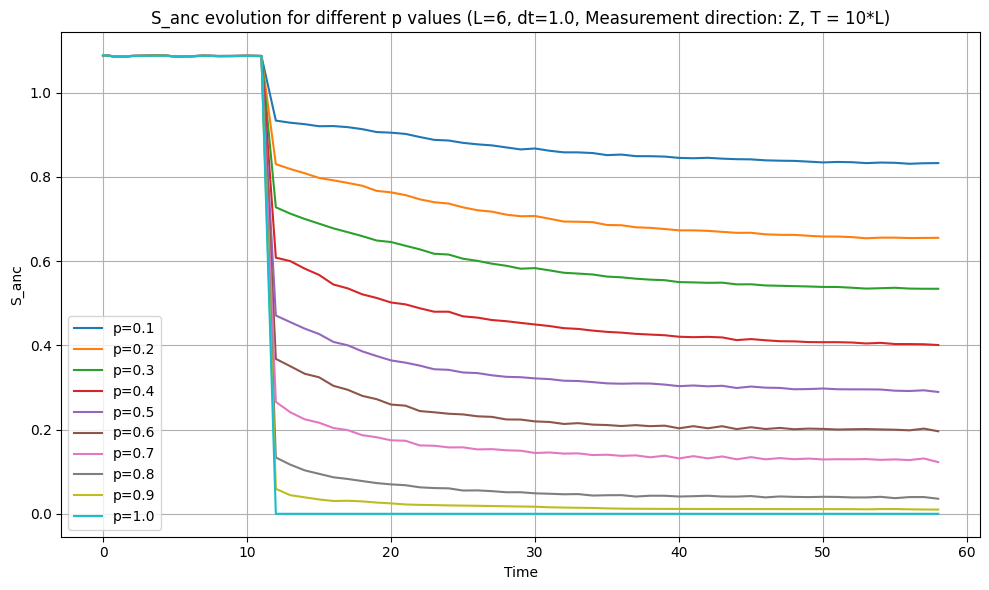

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z, T = 10*L)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_6_vs_t10L_z_ghz.svg')
plt.show()


In [11]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_anc/L_5/Emean_L5,T50,dt1.0,p0.6_anc.npy")

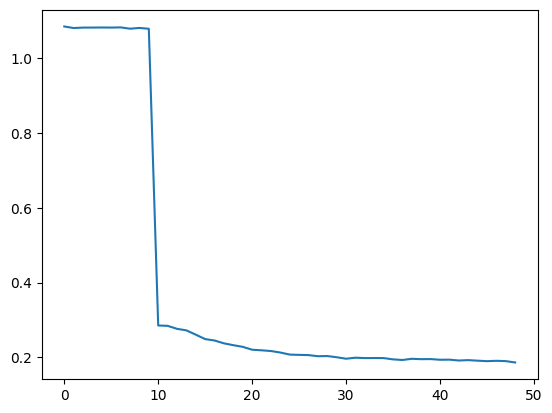

In [12]:
plt.plot(data)